In [ ]:
#import pandas libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#uploading dataset
df=pd.read_csv('cinema_hall_ticket_sales.csv')
display(df)

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,Sci-Fi,Standard,2,Yes
1436,C4357,19,11.45,Action,Standard,Alone,No
1437,R7285,53,17.13,Comedy,Premium,Alone,Yes
1438,W6360,34,20.25,Comedy,Premium,2,Yes


In [ ]:
# using info function to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ticket_ID         1440 non-null   object 
 1   Age               1440 non-null   int64  
 2   Ticket_Price      1440 non-null   float64
 3   Movie_Genre       1440 non-null   object 
 4   Seat_Type         1440 non-null   object 
 5   Number_of_Person  1440 non-null   object 
 6   Purchase_Again    1440 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 78.9+ KB


In [ ]:
#checking the null values
df.isnull().sum()

,0
Ticket_ID,0
Age,0
Ticket_Price,0
Movie_Genre,0
Seat_Type,0
Number_of_Person,0
Purchase_Again,0


In [ ]:
#checking the duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#checking duplicate values for perticular features
df['Ticket_ID'].duplicated().sum()

np.int64(4)

In [ ]:
#dropping the duplicate values
df=df.drop_duplicates(subset='Ticket_ID')
df

,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes
...,...,...,...,...,...,...,...
1435,E5406,41,17.09,Sci-Fi,Standard,2,Yes
1436,C4357,19,11.45,Action,Standard,Alone,No
1437,R7285,53,17.13,Comedy,Premium,Alone,Yes
1438,W6360,34,20.25,Comedy,Premium,2,Yes


In [ ]:
df.isnull().sum()

,0
Ticket_ID,0
Age,0
Ticket_Price,0
Movie_Genre,0
Seat_Type,0
Number_of_Person,0
Purchase_Again,0


In [ ]:
## Count the occurrences of each genre
ticket=df['Movie_Genre'].value_counts()
ticket

,count
Movie_Genre,
Action,309
Horror,299
Comedy,286
Drama,284
Sci-Fi,258


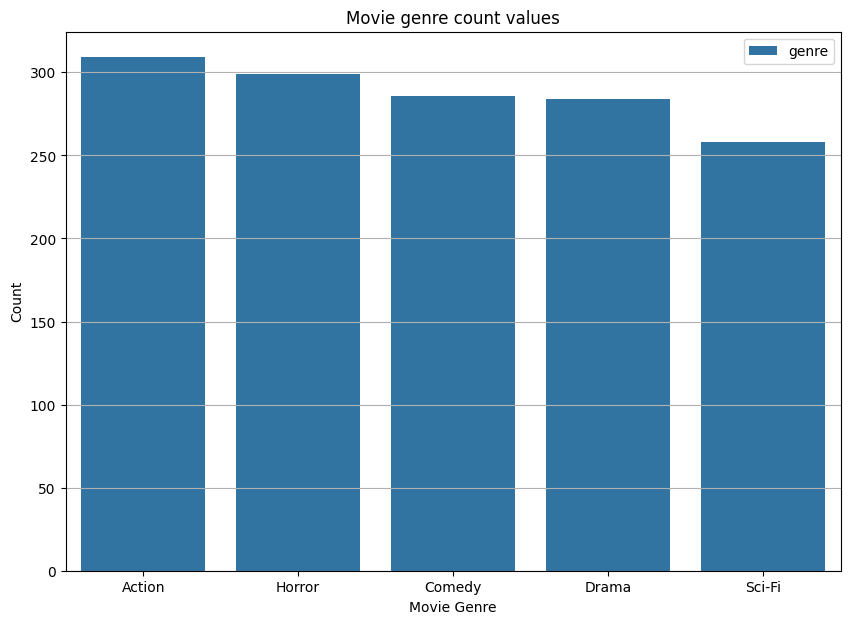

In [ ]:
#Bar plot of most watching movie genre
plt.figure(figsize=(10,7))# Set the size of the figure for better visualization
#syntax:sns.lineplot(x,y,data)
sns.barplot(x=ticket.index,y=ticket.values,label='genre')
plt.title('Most Watched Movie Genre')#Set the title of the plot
plt.xlabel('Movie Genre')#Set the x-axis label
plt.ylabel('Count')#Set the y-axis label
plt.legend()#Add a legend to the plot
plt.grid(axis='y')#Add a grid to the y-axis
plt.show()#Display the plot



In [ ]:
ticket=df.groupby('Movie_Genre')['Ticket_Price'].sum()
ticket

,Ticket_Price
Movie_Genre,
Action,5254.06
Comedy,4946.67
Drama,4884.18
Horror,5296.52
Sci-Fi,4593.55


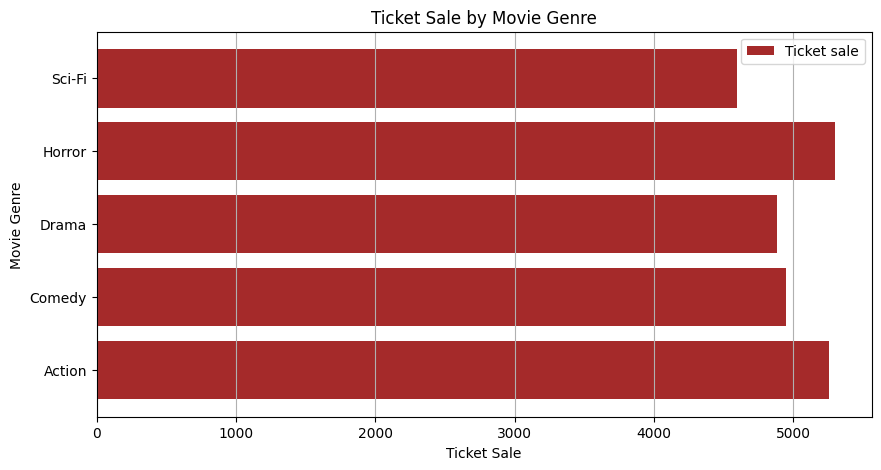

In [ ]:
# Bar chart: Visualization of Ticket Sales by Movie Genre
# Set the size of the figure for better visualization
plt.figure(figsize=(10,5))
#Syntax: plt.bar(categories, values, color='red')
plt.barh(ticket.index,ticket.values,color='brown',label='Ticket sale')
plt.title('Ticket Sale by Movie Genre')#set the title of the plot
plt.xlabel('Ticket Sale')#set the x-axis label
plt.ylabel('Movie Genre')#set the y-axis label
plt.legend()#Add a legend to the plot
plt.grid(axis='x')# Add a grid to the plot for better readability
plt.show()#Display the plot



In [ ]:
df.groupby(['Number_of_Person','Seat_Type','Purchase_Again'])['Movie_Genre'].count()

Number_of_Person  Seat_Type  Purchase_Again
2                 Premium    No                 30
                             Yes                15
                  Standard   No                 16
                             Yes                17
                  VIP        No                 11
                             Yes                19
3                 Premium    No                 23
                             Yes                20
                  Standard   No                 23
                             Yes                25
                  VIP        No                 18
                             Yes                10
4                 Premium    No                 26
                             Yes                16
                  Standard   No                 16
                             Yes                22
                  VIP        No                 28
                             Yes                18
5                 Premium    No                  9
                             Yes                16
                  Standard   No                 16
                             Yes                25
                  VIP        No                 16
                             Yes                25
6                 Premium    No                 34
                             Yes                17
                  Standard   No                 24
                             Yes                14
                  VIP        No                 32
                             Yes                30
7                 Premium    No                 14
                             Yes                25
                  Standard   No                 22
                             Yes                20
                  VIP        No                 29
                             Yes                23
Alone             Premium    No                108
                             Yes               118
                  Standard   No                108
                             Yes               123
                  VIP        No                129
                             Yes               106
Name: Movie_Genre, dtype: int64

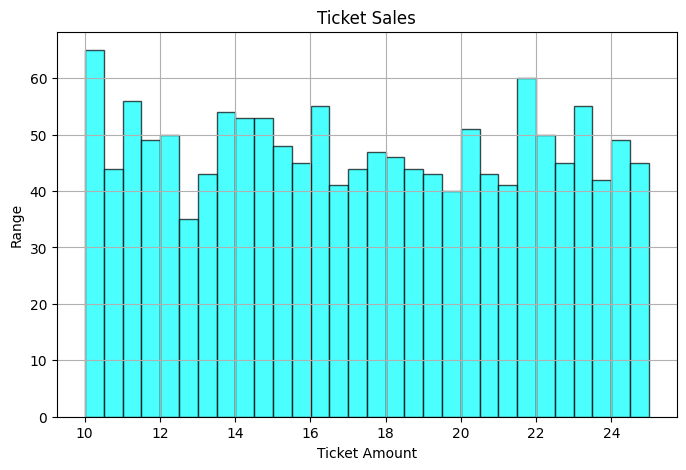

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Ticket_Price'], bins=30, color='cyan', edgecolor='black', alpha=0.7)
plt.title('Ticket Sales')
plt.xlabel('Ticket Amount')
plt.ylabel('Range')
plt.grid()
plt.show()

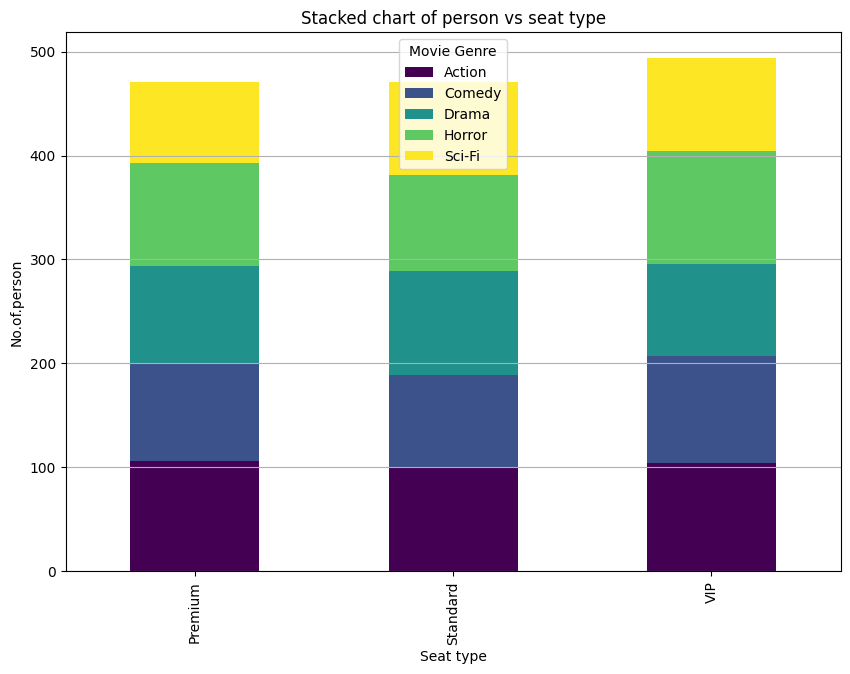

In [ ]:
#Stacked bar chart
ticket_status= df.pivot_table(values='Number_of_Person', index='Seat_Type', columns='Movie_Genre', aggfunc='count')
ticket_status.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Stacked chart of person vs seat type')
plt.xlabel('Seat type')
plt.ylabel('No.of.person')
plt.legend(title='Movie Genre')
plt.grid(axis='y')
plt.show()



Text(0.5, 1.0, 'Bar chart of Ticket Price')

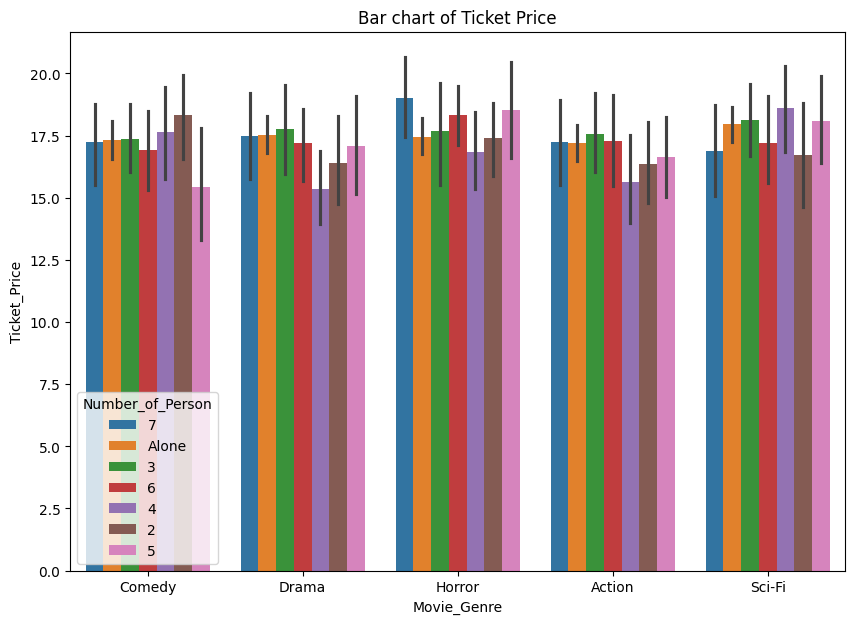

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Movie_Genre',y='Ticket_Price',data=df,hue='Number_of_Person')
plt.title('Bar chart of Ticket Price')


<Axes: xlabel='Age', ylabel='Ticket_Price'>

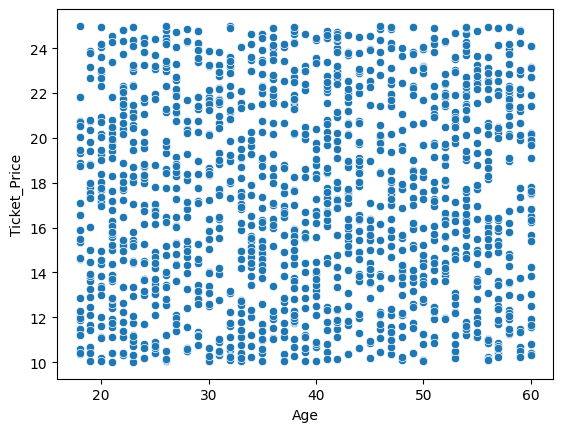

In [ ]:
sns.scatterplot(x='Age',y='Ticket_Price',data=df)

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
x = np.linspace(0, 10, 100)
y = np.sin(x)
axes[0, 0].plot(x=ticket.index, y=ticket.values, color='blue')
axes[0, 0].set_title('Line Plot')
axes[0, 1].scatterplot(x, y, color='green')
axes[0, 1].set_title('Scatter Plot')
axes[1, 0].pie(a.values,labels=a.index,autopct='%1.1f%%')
axes[1, 0].set_title('Pie Chart')
axes[1, 1].hist(df['Ticket_Price'], bins=30, color='cyan',edgecolor='black')
axes[1, 1].set_title('Histogram')
axes[2, 0].barh(b.index,b.values,color='green',label='Ticket Price')
axes[2, 0].set_title('Horizhontal Bar Chart')
axes[2, 1].bar(ticket.index,ticket.values,color='brown',label='Ticket sale')
axes[2, 1].set_title('Bar Chart')
plt.tight_layout()
plt.show()